___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns={"Annual Income (k$)": "annual_income","Spending Score (1-100)": "spending_score", "Age":"age", "Gender":"gender"}, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [8]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [12]:
df.gender.value_counts()

0    112
1     88
Name: gender, dtype: int64

In [13]:
df.describe()

,CustomerID,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [9]:
df2=df.copy()

In [10]:
df.drop("CustomerID", axis=1, inplace=True)

In [11]:
df.nunique()

gender             2
age               51
annual_income     64
spending_score    84
dtype: int64

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

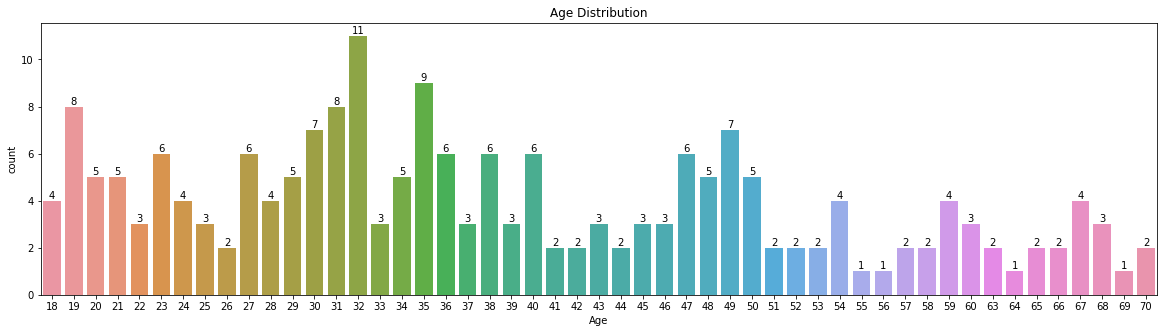

In [14]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x ='age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);
# 5 cluster olabilir.

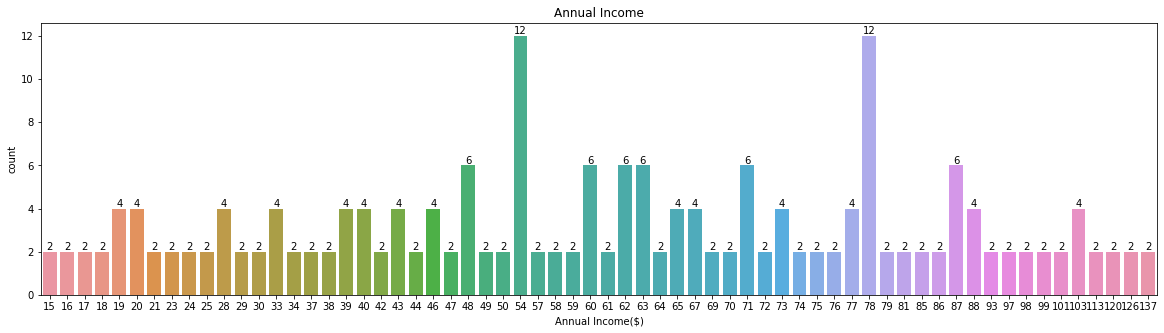

In [18]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='annual_income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);
# 4 cluster uygun gibi.

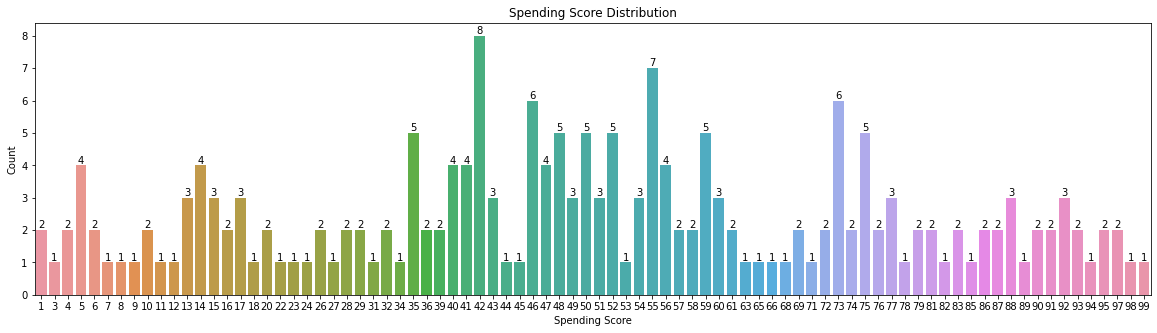

In [19]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='spending_score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);
# 4 cluster uygun gibi.

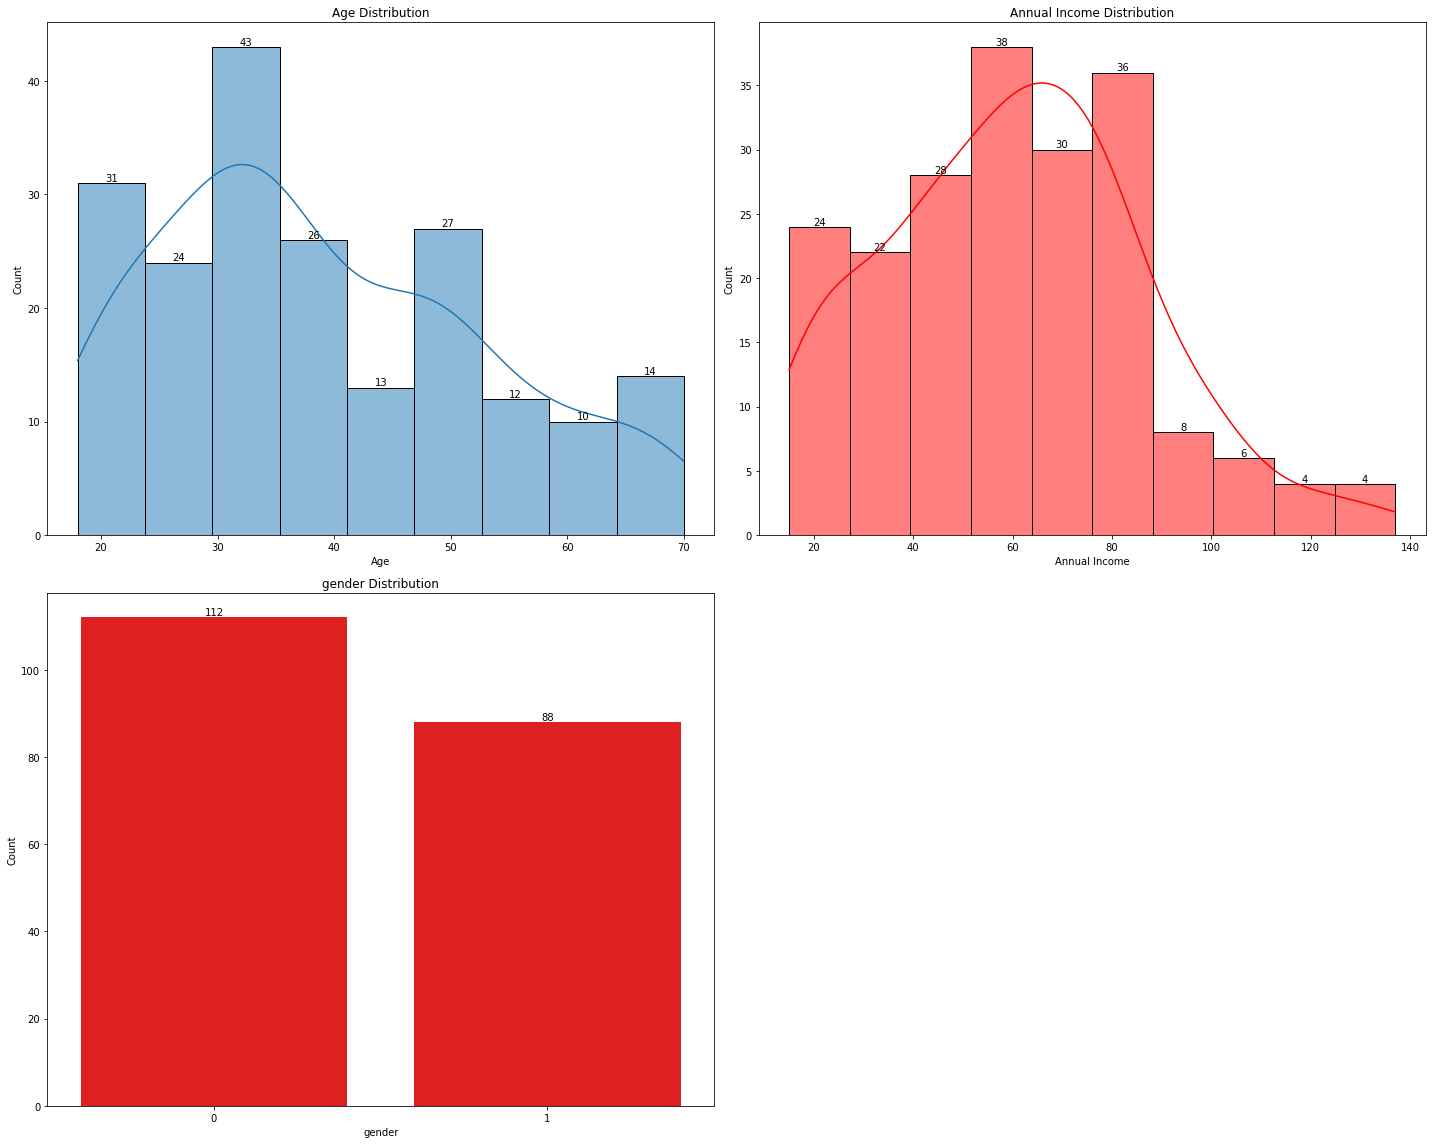

In [21]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
ax = sns.histplot(x='age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(2,2,2)
ax = sns.histplot(x ='annual_income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(2,2,3)
ax = sns.countplot(x ='gender', data=df, color='red')
plt.title('gender Distribution')
plt.xlabel('gender')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])

plt.tight_layout();

In [ ]:
# gender: unbalanced
# age: right skiwed
# annual income: between normal distribution and right skiwed

(-1.25, 1.25, -1.25, 1.25)

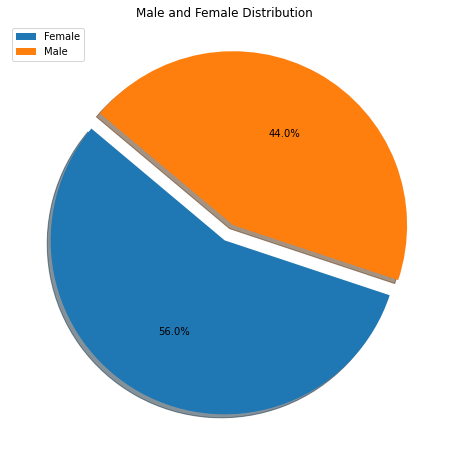

In [22]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

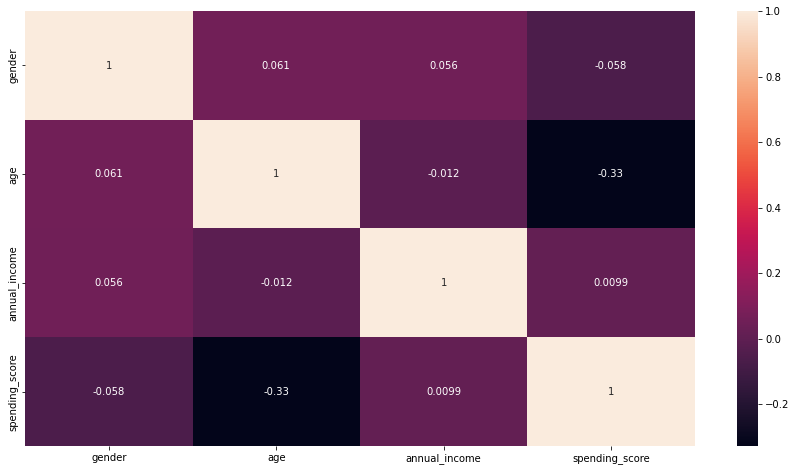

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()
# multi corole feature yok. 

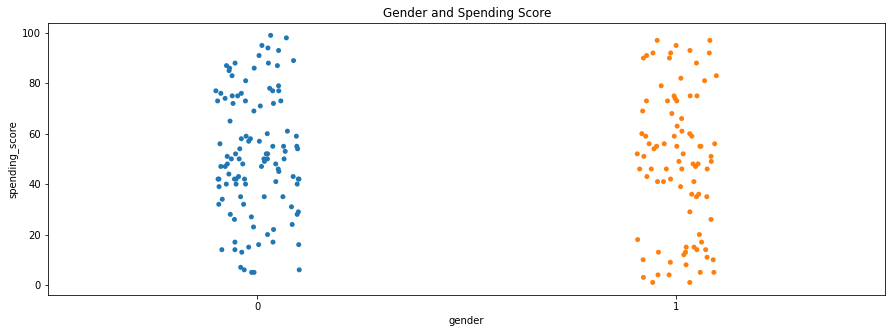

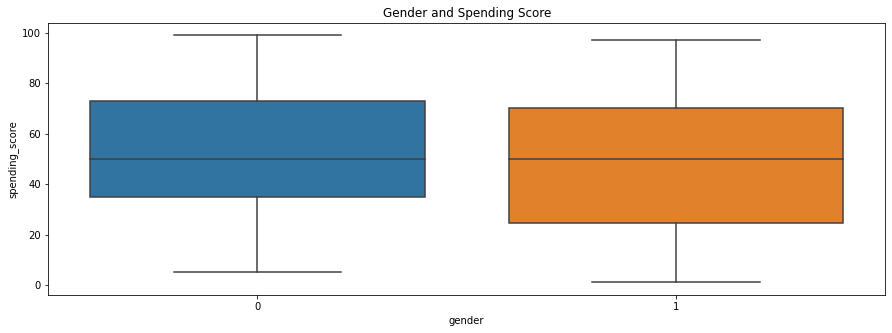

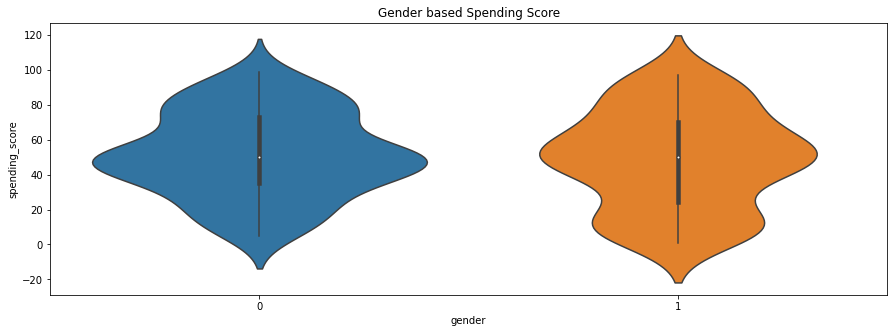

In [23]:
plt.figure(figsize=(15,5))
sns.stripplot(x='gender', y='spending_score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='gender', y='spending_score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='gender', y='spending_score', data=df)
plt.title('Gender based Spending Score')
plt.show()

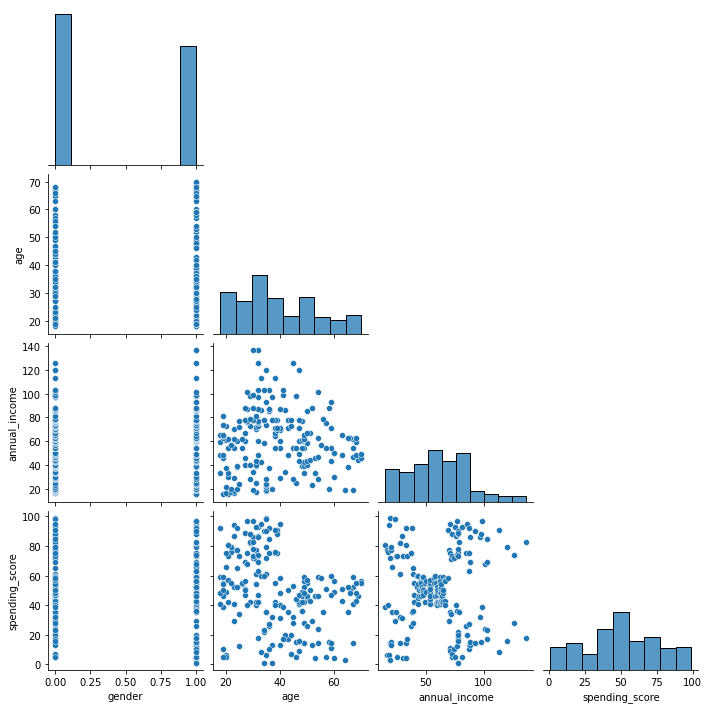

In [27]:
sns.pairplot(df,corner=True)

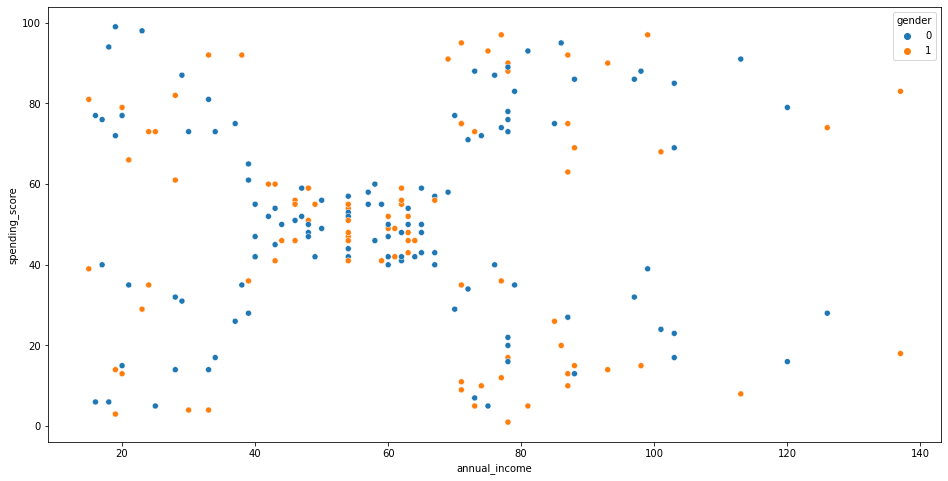

In [25]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='annual_income', y='spending_score', data=df, hue = "gender")
plt.show()

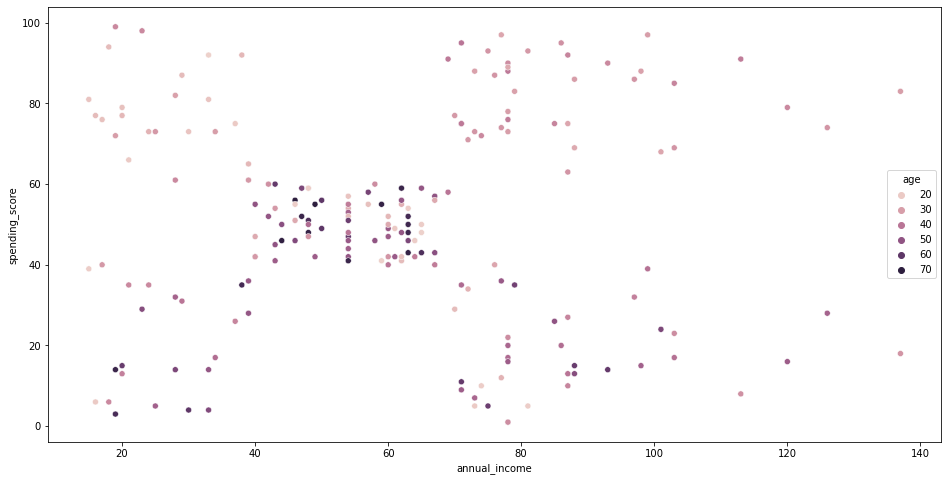

In [26]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='annual_income', y='spending_score', data=df, hue = "age")
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [28]:
df.drop(columns="gender",axis=1,inplace=True) # cluster modellerde dummy features düşürülmeli. 

In [29]:
from pyclustertend import hopkins

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
hopkins(StandardScaler().fit_transform(df), df.shape[0])

0.3058398761930535

In [32]:
X = df[{"age", "spending_score"}]
X

,spending_score,age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31
...,...,...
195,79,35
196,28,45
197,74,32
198,18,32


In [33]:
hopkins(StandardScaler().fit_transform(X), X.shape[0])

0.3041330189483343

#### *ii. Determine optimal number of clusters*

In [35]:
scaler = StandardScaler()

In [36]:
X_scaled= scaler.fit_transform(X)

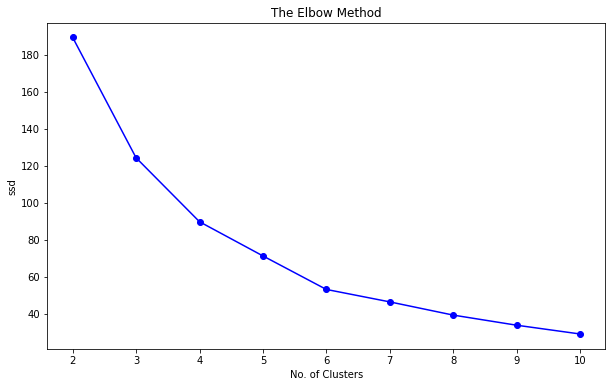

In [37]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
# elbow a göre 3 cluster uygun gibi.

In [38]:
ssd

[189.3874903399244,
 124.32628617921526,
 89.76521676586151,
 71.2955659221944,
 53.173737453809174,
 46.4462850094916,
 39.30587325192688,
 33.83644725407146,
 29.0941036870876]

In [39]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,65.061204
3,34.561069
4,18.469651
5,18.121828
6,6.727452
7,7.140412
8,5.469426
9,4.742344


<AxesSubplot:>

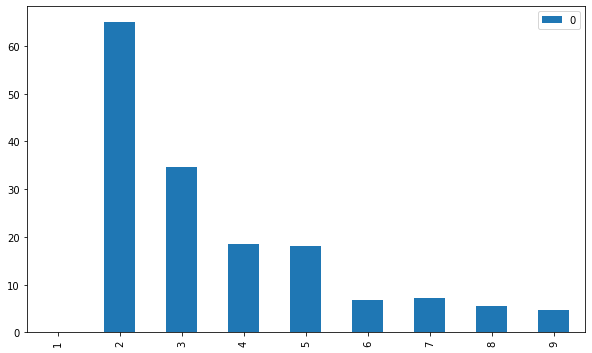

In [40]:
df_diff.plot(kind='bar')

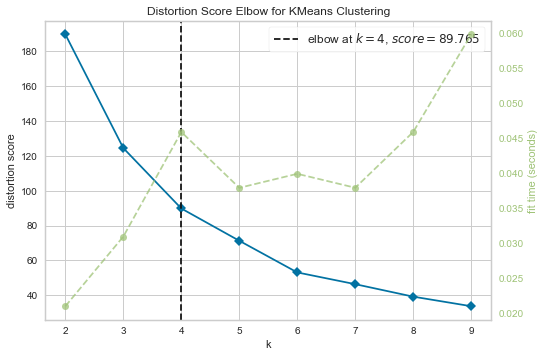

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X_scaled)
visu.poof()

In [42]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.4395299000210192
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007986
For n_clusters=8, the silhouette score is 0.4138741299235443
For n_clusters=9, the silhouette score is 0.4230225675027671
For n_clusters=10, the silhouette score is 0.441896169330358


In [ ]:
#silhouette score a göre 5 veya 6 cluster uygun gibi.

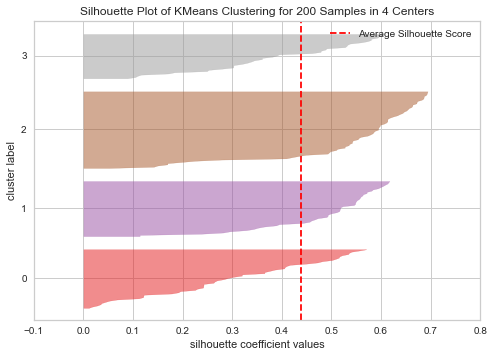

In [43]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [ ]:
# Görseller ve silhouette score değerlendirildiğinde 5 cluster a karar verdim. 

#### *iii. Apply K Means*

In [44]:
kmeans = KMeans(n_clusters = 5, random_state=42)

In [45]:
kmeans.fit_predict(X_scaled)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [46]:
centers =kmeans.cluster_centers_
centers

array([[ 1.16294838, -0.62504301],
       [-0.14579653,  0.59486612],
       [-1.34568786,  0.47287247],
       [-0.0798615 ,  1.87328147],
       [-0.32446652, -1.05629236]])

In [47]:
centers[:,0]

array([ 1.16294838, -0.14579653, -1.34568786, -0.0798615 , -0.32446652])

In [48]:
centers[:,1]

array([-0.62504301,  0.59486612,  0.47287247,  1.87328147, -1.05629236])

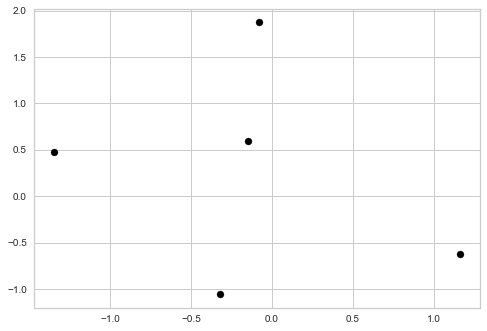

In [49]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

In [50]:
X["cluster_Kmeans"] = kmeans.fit_predict(X_scaled)

In [51]:
X.head()

,spending_score,age,cluster_Kmeans
0,39,19,4
1,81,21,0
2,6,20,4
3,77,23,0
4,40,31,4


<AxesSubplot:xlabel='age', ylabel='spending_score'>

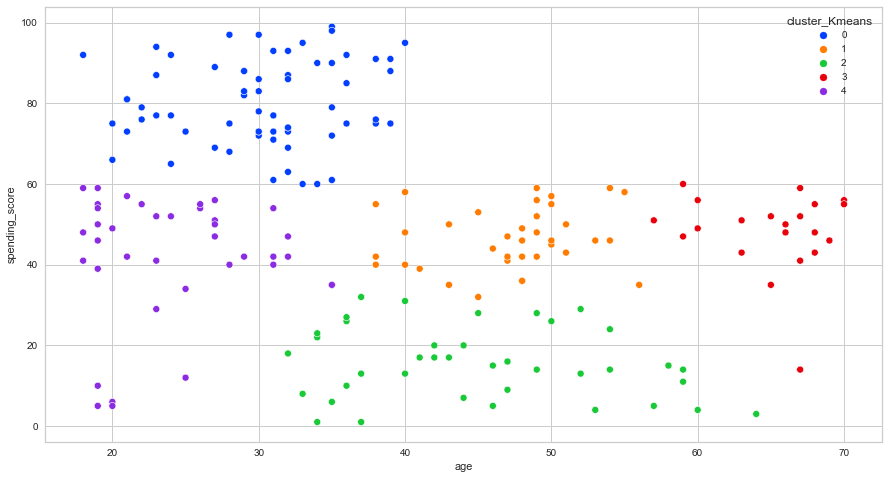

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='spending_score', hue='cluster_Kmeans', data=X, palette="bright")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [56]:
X2 = df.loc[:,['annual_income','spending_score']]
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [57]:
X2.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


#### *ii. Determine optimal number of clusters*

In [58]:
hopkins(X2, X2.shape[0])

0.30642590855825363

In [59]:
hopkins(StandardScaler().fit_transform(X2), X2.shape[0])

0.29123557754916246

In [60]:
X2_scaled= scaler.fit_transform(X2)

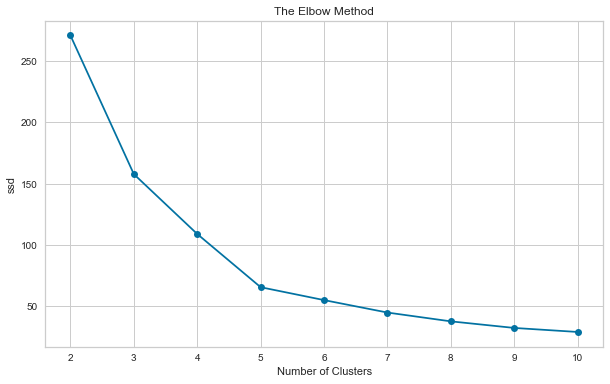

In [61]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [62]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

#elboe a göre cluster sayısı 3

,0
1,NaN
2,113.000258
3,48.782692
4,43.352908
5,10.511060
6,10.146163
7,7.174782
8,5.361150
9,3.284685


<AxesSubplot:>

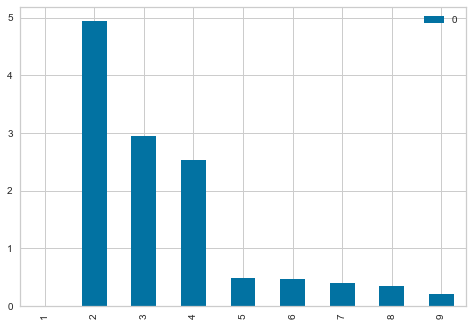

In [99]:
df_diff.plot(kind='bar')

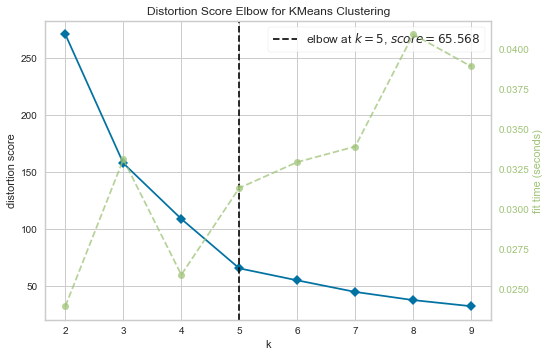

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2_scaled)
visu.poof()
# yellowbrick e göre cluster 5

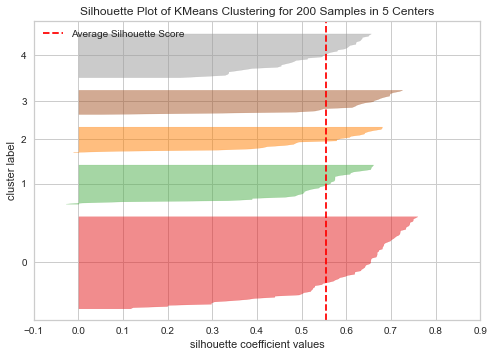

In [64]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [65]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706
For n_clusters=9, the silhouette score is 0.45532159949822093
For n_clusters=10, the silhouette score is 0.4476280825932578


In [ ]:
# silhouette score a göre cluster sayısı 5. 
# Ortak değerlendirme sonucu domain bilgiside olmadığı için cluster 5 ile devam ettim.

#### *iii. Apply K Means*

In [66]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [67]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2_scaled) #kmeans2.labels_
X2

,annual_income,spending_score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

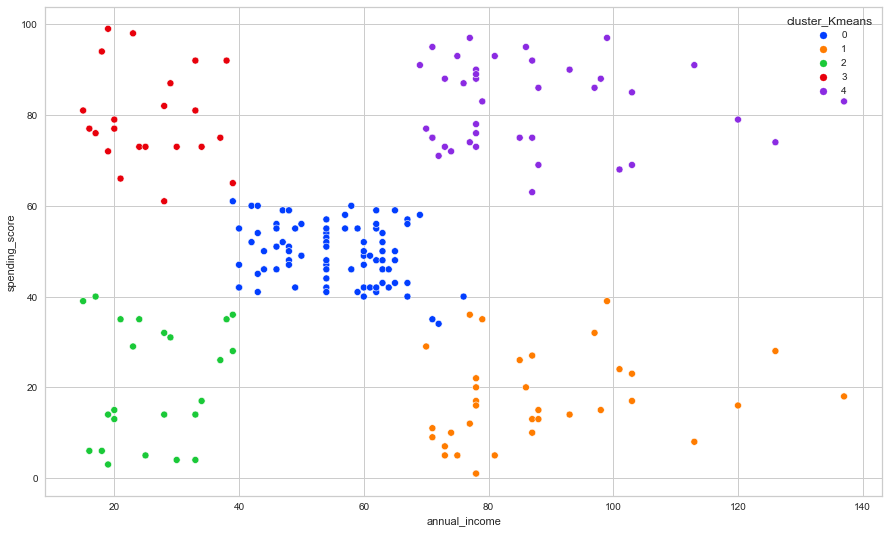

In [68]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Kmeans', data=X2, palette="bright")

In [ ]:
# 5 cluster ayrımının uygun olduğunu değerlendirdim. 

# 1 : Geliri az. geliri oranında kadar harcar. 
# 2 : Geliri az. geliri oranının üzerinde harcar.  
# 3 : Geliri orta. geliri oarnında harcar.
# 4 : Geliri fazla. geliri oranında harcar.
# 5 : Geliri fazla. Geliri oranının altında harcar.



### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [69]:
from scipy.cluster.hierarchy import linkage

In [71]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

In [72]:
from scipy.cluster.hierarchy import dendrogram

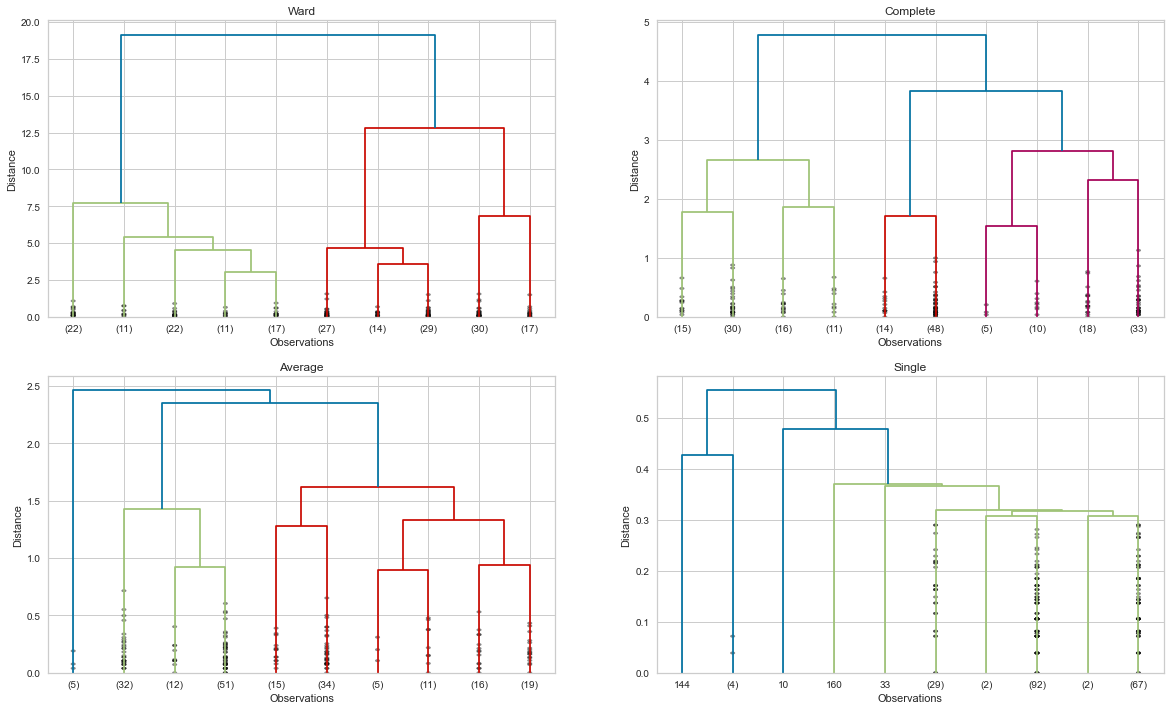

In [73]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

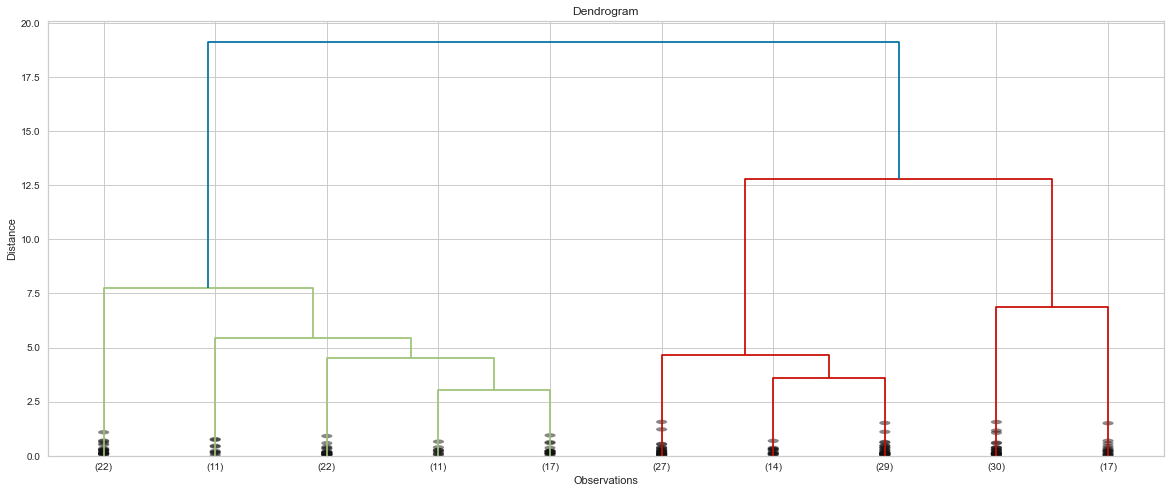

In [74]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

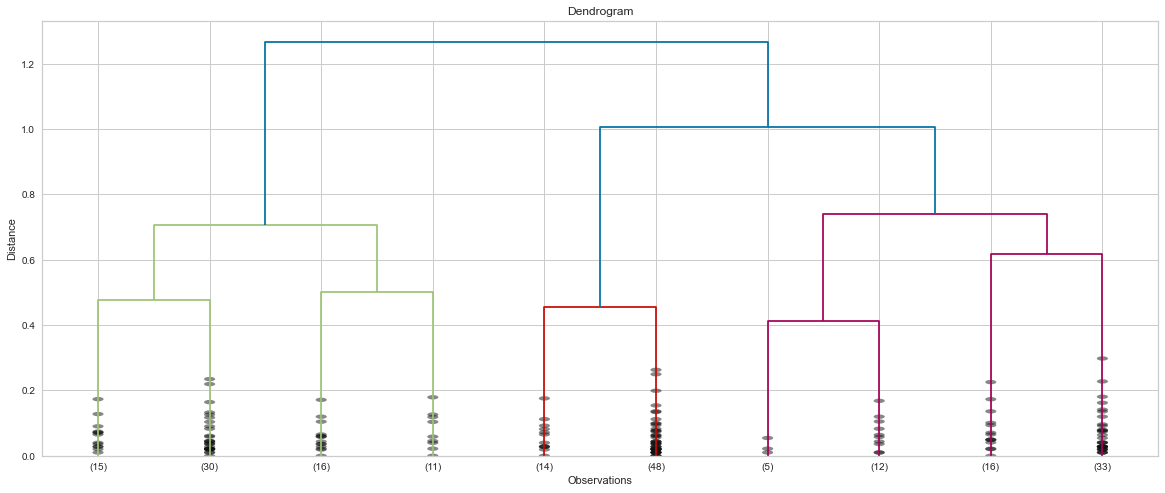

In [118]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [ ]:
# ward dendogram a göre cluster 3

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_scaled)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41449964268735984
For n_clusters=3, the silhouette score is 0.41664148520394606
For n_clusters=4, the silhouette score is 0.3892700489345869
For n_clusters=5, the silhouette score is 0.3764554127950157
For n_clusters=6, the silhouette score is 0.39906905665343273
For n_clusters=7, the silhouette score is 0.3586046783668453
For n_clusters=8, the silhouette score is 0.3610812833213386
For n_clusters=9, the silhouette score is 0.3659083749736621
For n_clusters=10, the silhouette score is 0.3688228754847425


In [77]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4552532942212694
For n_clusters=3, the silhouette score is 0.4409028856727409
For n_clusters=4, the silhouette score is 0.43574759922739
For n_clusters=5, the silhouette score is 0.4043295175353827
For n_clusters=6, the silhouette score is 0.4153001428374591
For n_clusters=7, the silhouette score is 0.41844956054729204
For n_clusters=8, the silhouette score is 0.38982896925246946
For n_clusters=9, the silhouette score is 0.3964146624735409
For n_clusters=10, the silhouette score is 0.39578519134819556


## Clustering based on Annual Income and Spending Score- x2

In [78]:
hc_ward = linkage(y = X2_scaled, method = "ward")
hc_complete = linkage(X2_scaled, "complete")
hc_average = linkage(X2_scaled, "average")
hc_single = linkage(X2_scaled, "single")

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

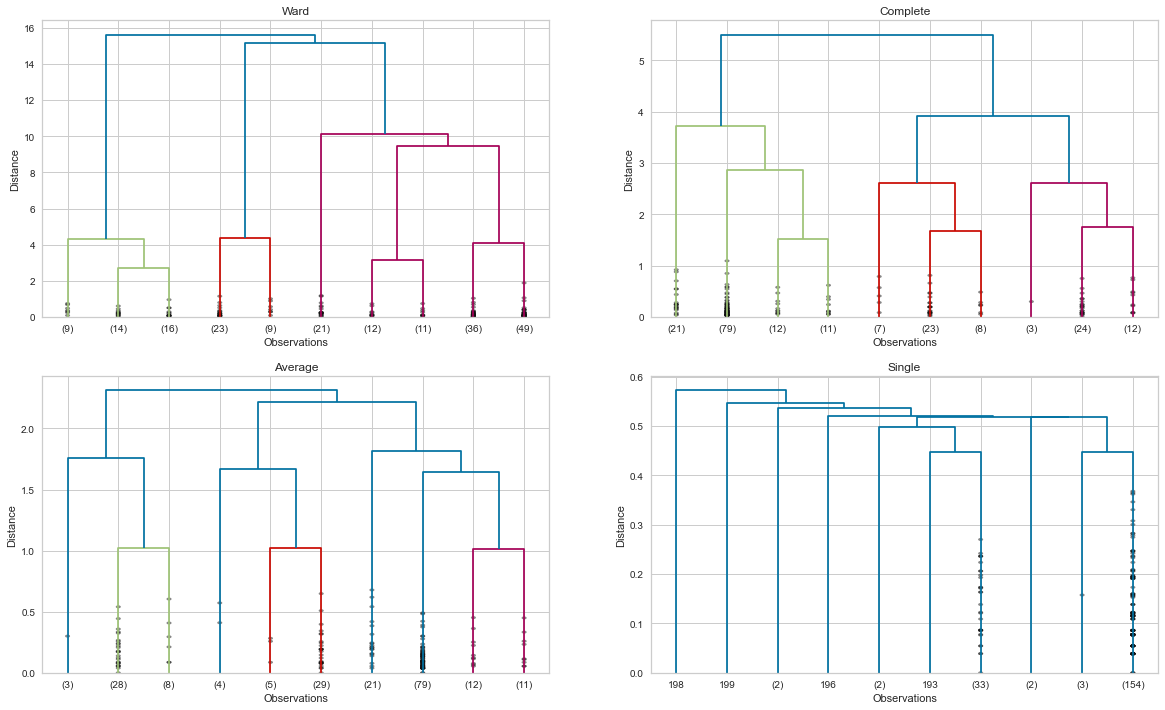

In [79]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

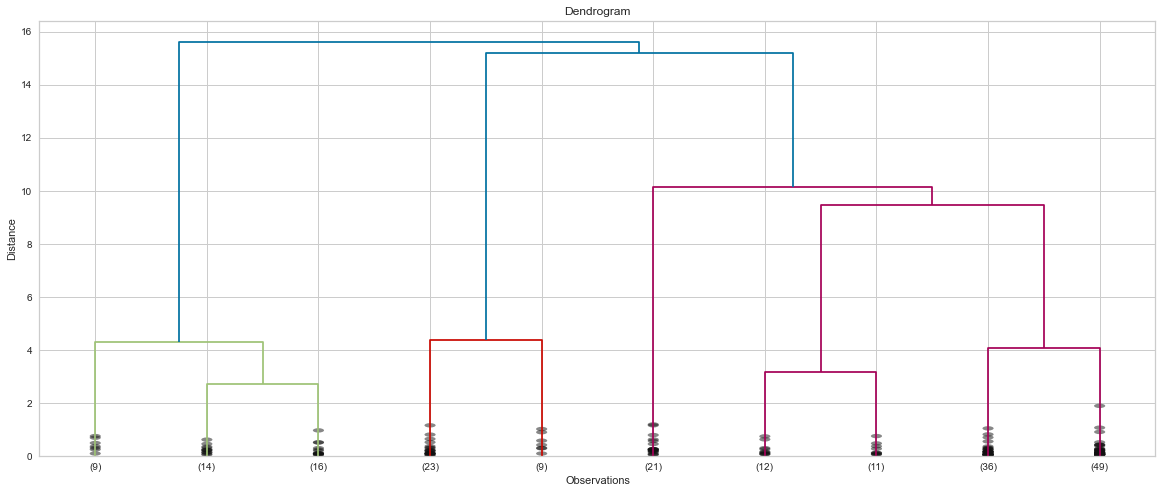

In [80]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

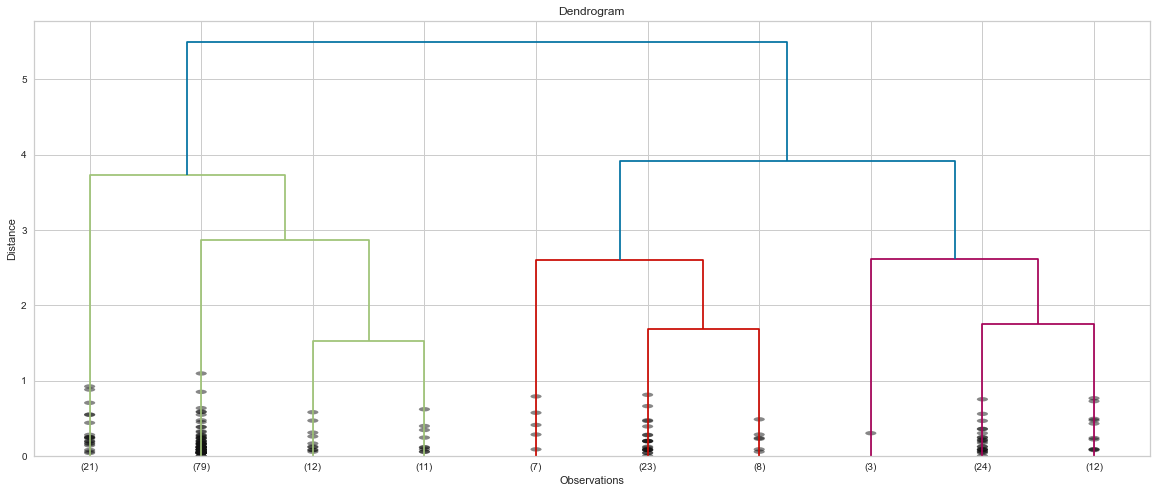

In [81]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [82]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2_scaled)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3842337621772661
For n_clusters=3, the silhouette score is 0.4610481446570447
For n_clusters=4, the silhouette score is 0.4925507715349343
For n_clusters=5, the silhouette score is 0.5538089226688662
For n_clusters=6, the silhouette score is 0.5386761871036926
For n_clusters=7, the silhouette score is 0.5197949293475768
For n_clusters=8, the silhouette score is 0.4308617778221774
For n_clusters=9, the silhouette score is 0.43768997758154127
For n_clusters=10, the silhouette score is 0.4339007174968657


In [83]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

In [89]:
Agg1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X_scaled)

In [90]:
X['cluster_Agg'] = y_agg
X.head()

,spending_score,age,cluster_Kmeans,cluster_Agg
0,39,19,4,1
1,81,21,0,2
2,6,20,4,1
3,77,23,0,2
4,40,31,4,1


#### Annual Income and Spending Score- x2

In [91]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2_scaled)

In [92]:
X2['cluster_Agg'] = y_agg2
X2.head()

,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

<AxesSubplot:xlabel='age', ylabel='spending_score'>

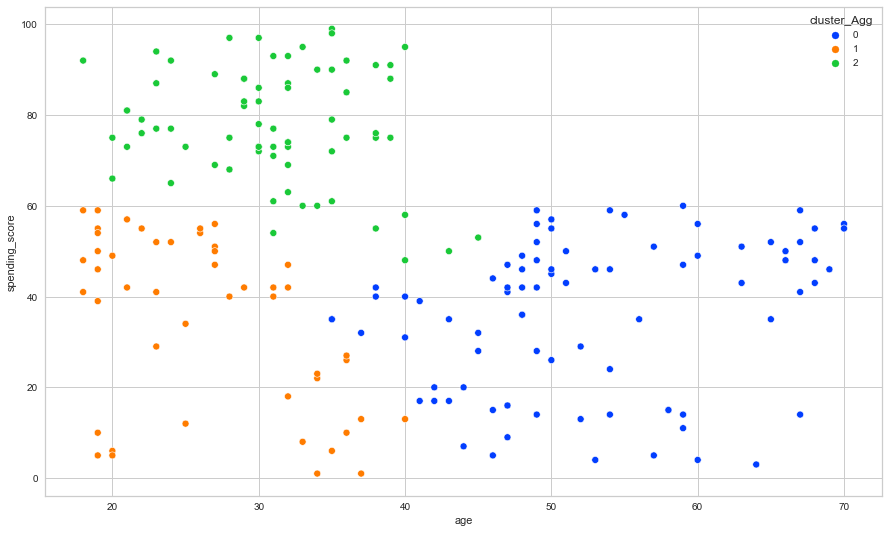

In [93]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='age', y='spending_score', hue='cluster_Agg', data=X, palette="bright")

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

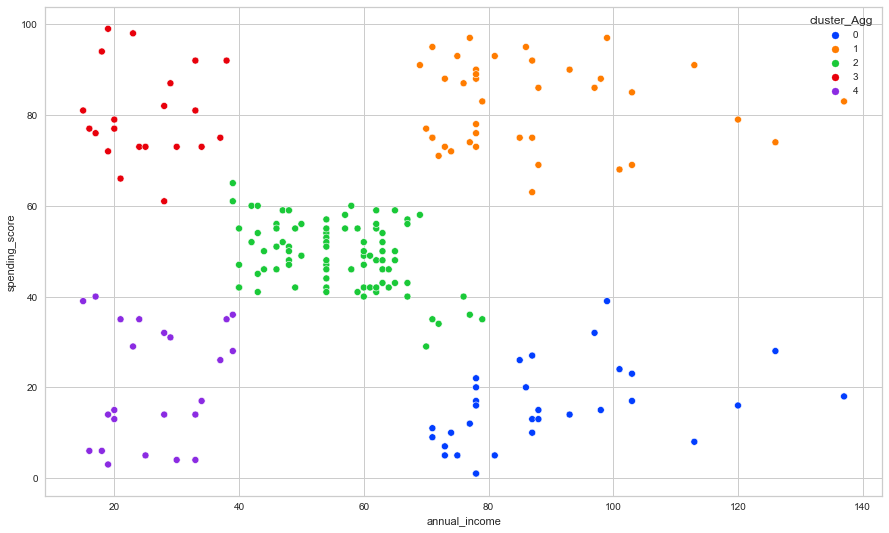

In [96]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Agg', data=X2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

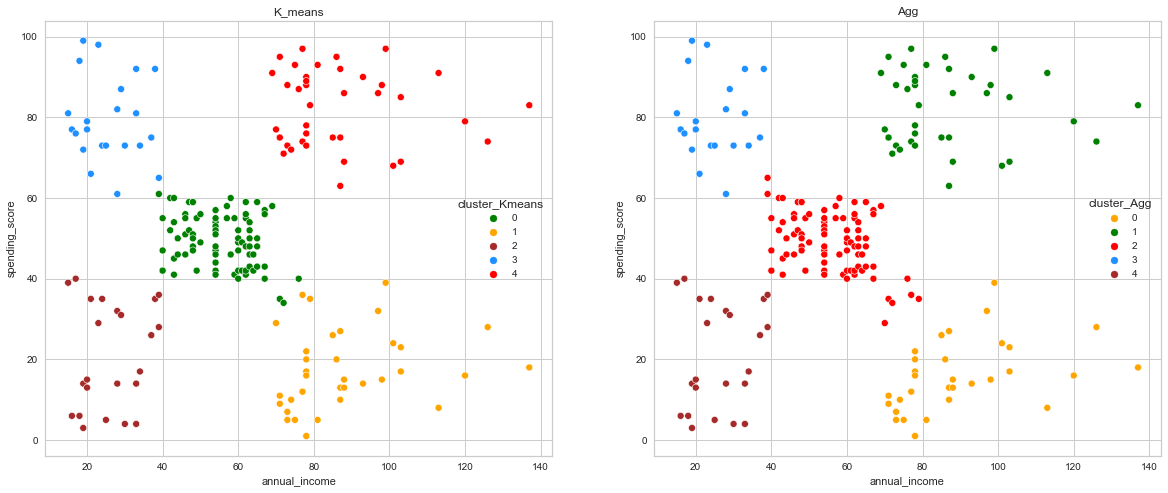

In [97]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

In [ ]:
# K-Means teki ayrışma daha net. 

#### Interpretation based on Age and Spending Score- x1

In [98]:
X.head()

,spending_score,age,cluster_Kmeans,cluster_Agg
0,39,19,4,1
1,81,21,0,2
2,6,20,4,1
3,77,23,0,2
4,40,31,4,1


In [99]:
X.cluster_Kmeans.value_counts()

0    64
2    41
4    38
1    36
3    21
Name: cluster_Kmeans, dtype: int64

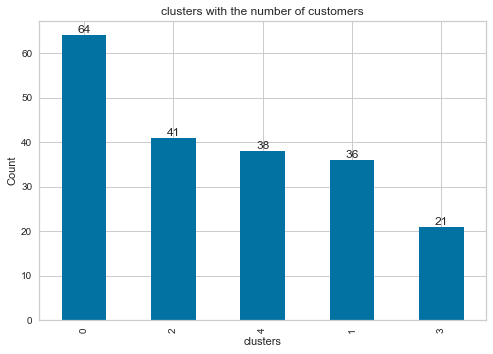

In [100]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [102]:
df.head()

,age,annual_income,spending_score,cluster_Age_Spending_Score
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [101]:
df["cluster_Age_Spending_Score"] = X.cluster_Kmeans
df.head()

,age,annual_income,spending_score,cluster_Age_Spending_Score
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


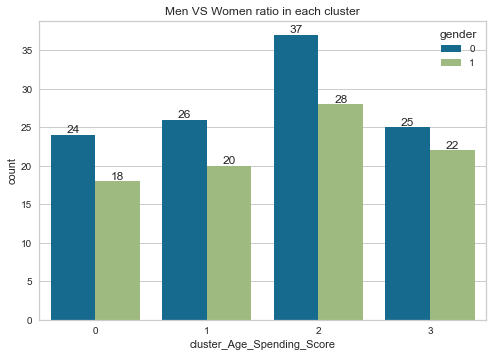

In [169]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.gender) #  1 : Male
for p in ax.containers:
    ax.bar_label(p)

In [103]:
df.groupby("cluster_Age_Spending_Score").mean()

,age,annual_income,spending_score
cluster_Age_Spending_Score,,,
0,30.140625,63.750000,80.156250
1,47.138889,57.250000,46.444444
2,45.439024,69.390244,15.536585
3,64.952381,51.523810,48.142857
4,24.131579,53.789474,41.842105


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='spending_score'>

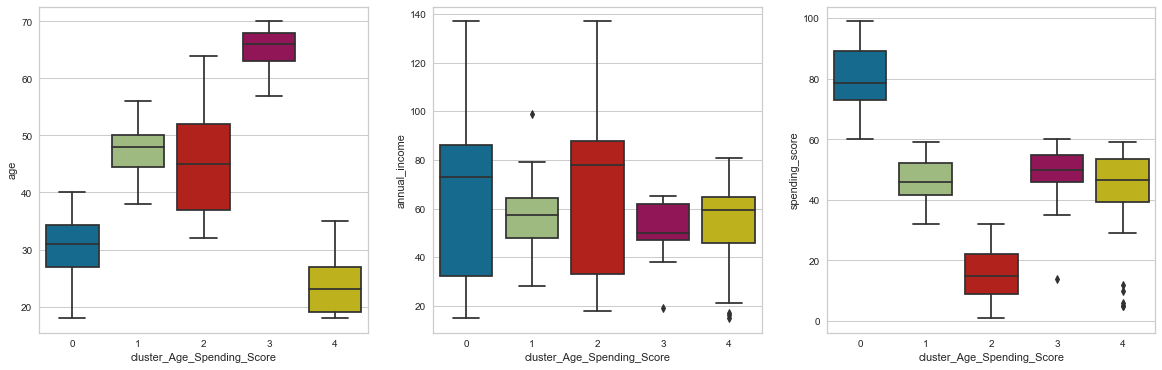

In [104]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "annual_income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "spending_score", x = "cluster_Age_Spending_Score", data = df)


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='spending_score'>

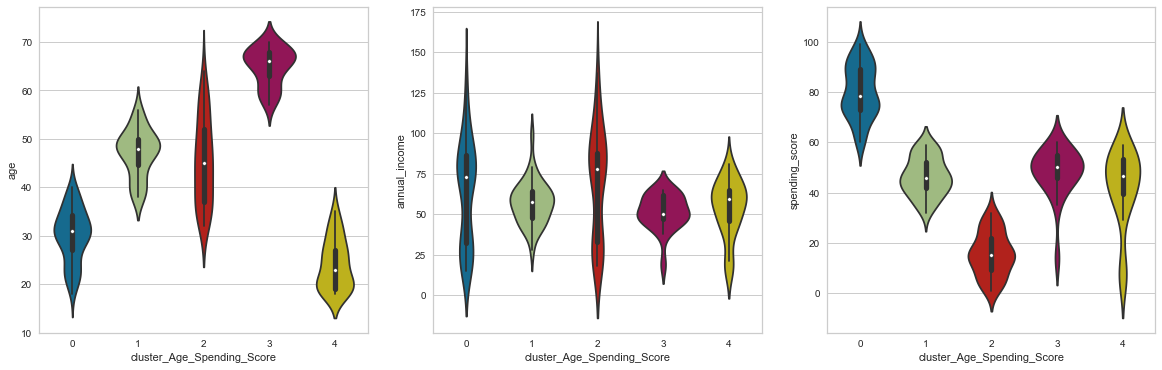

In [105]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.violinplot(y = "age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.violinplot(y = "annual_income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.violinplot(y = "spending_score", x = "cluster_Age_Spending_Score", data = df)

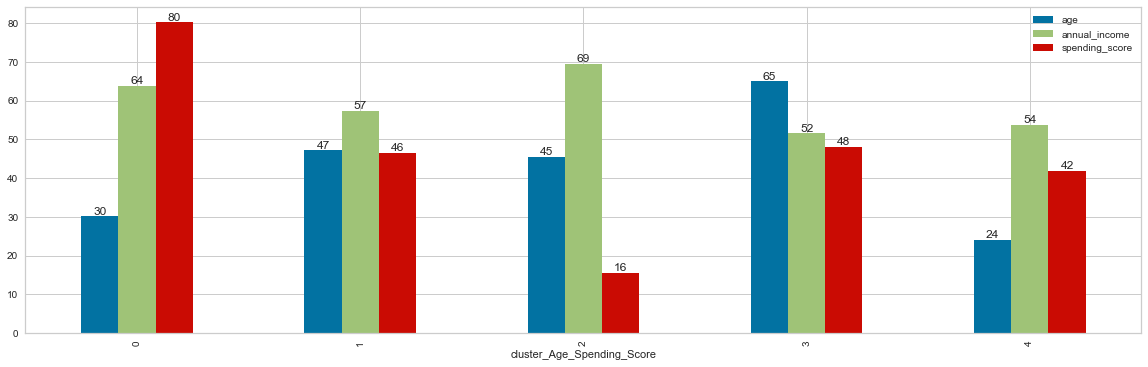

In [106]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

In [ ]:
# 2 grubuna(para var ama harcamayan) yönelik çalışma yapılması lazım. 